In [1]:
from articlehelper import ArticleHandler, map_paragraphs, map_category_ukrpravda
import numpy as np
import pandas as pd
from clfhelpers import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, mutual_info_score, adjusted_mutual_info_score
from analyzers import PosAnalyzer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

MASK = 'data\\news'
zip_fname = MASK + '.zip'
train_fname = MASK + '_train.txt'
test_fname = MASK + '_test.txt'

In [2]:
train = ArticleHandler.read_zip_list(zip_fname, load_filelist = True, filelist_name = train_fname) #TODO: simplify
print(len(train))
test = ArticleHandler.read_zip_list(zip_fname, load_filelist = True, filelist_name = test_fname)
print(len(test))

2250
750


In [3]:
df_train = pd.DataFrame.from_dict(map_paragraphs(train, map_category_ukrpravda))
df_train.groupby(['category']).count()


,doc,text
category,,
articles,15584,15584
blog,10150,10150
columns,11328,11328
news,10900,10900


In [4]:
df_test = pd.DataFrame.from_dict(map_paragraphs(test, map_category_ukrpravda))
df_test.groupby(['category']).count()

,doc,text
category,,
articles,4828,4828
blog,3235,3235
columns,4092,4092
news,3832,3832


In [5]:
X_train = df_train['text'].values
X_test = df_test['text'].values
y_train = df_train['category'].values
y_test = df_test['category'].values

In [6]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

47962 15987 47962 15987


In [9]:
from sklearn.externals import joblib
import re

class ClfFactoryNgrams:
    re_alphabet = re.compile(r'[^АаБбВвГгҐґДдЕеЄєЖжЗзИиІіЇїЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЬьЮюЯя\'’]', re.IGNORECASE)
    re_spaces = re.compile(r' {2,}')
    re_quotes = re.compile(r'\'{2}')
    
    def __init__(self, vectorizer_params):
        self.vectorizer_params = vectorizer_params

    @staticmethod
    def preprocessor(text):
        s = ' ' + ClfFactoryNgrams.re_alphabet.sub(' ', text) + ' '
        s = s.replace('’', '\'')
        s = ClfFactoryNgrams.re_quotes.sub('', s)
        return ClfFactoryNgrams.re_spaces.sub(' ', s)
    
#     def get_analyzer(self):
#         return self.make_vectorizer().build_analyzer()
    
    def make_classifier(self):
        return MultinomialNB(alpha=0.05)
    
    def make_vectorizer(self):
        vectorizer = TfidfVectorizer(vocabulary=self.vectorizer_params['vocabulary'])
        vectorizer.set_params(analyzer = self.vectorizer_params['analyzer'])
        vectorizer.set_params(binary = self.vectorizer_params['binary'])
        vectorizer.set_params(decode_error  = self.vectorizer_params['decode_error'])
        vectorizer.set_params(encoding = self.vectorizer_params['encoding']) 
        vectorizer.set_params(max_df = self.vectorizer_params['max_df'])
        vectorizer.set_params(max_features = self.vectorizer_params['max_features'])
        vectorizer.set_params(min_df = self.vectorizer_params['min_df'])
        vectorizer.set_params(ngram_range = self.vectorizer_params['ngram_range'])
        vectorizer.set_params(preprocessor = ClfFactoryNgrams.preprocessor)
        vectorizer.set_params(stop_words = self.vectorizer_params['stop_words'])
        vectorizer.set_params(strip_accents = self.vectorizer_params['strip_accents'])
        vectorizer.set_params(token_pattern = self.vectorizer_params['token_pattern'])
        vectorizer.set_params(tokenizer = self.vectorizer_params['tokenizer'])
        return vectorizer
    
print('Saved features')
vectorizer_params = joblib.load('ngram_vectorizer_params.pkl')
for x, v in vectorizer_params.items():
    try:
        print(x, len(v))
    except:
        print(x, v)
factory = ClfFactoryNgrams(vectorizer_params)       
          

Saved features
analyzer 7
binary False
decode_error 6
dtype <class 'numpy.int64'>
encoding 5
input 7
lowercase False
max_df 1.0
max_features 7000
min_df 5
ngram_range 2
preprocessor None
stop_words None
strip_accents None
token_pattern 13
tokenizer None
vocabulary 155648


In [10]:
print('\nLoaded features')        
tfidf = factory.make_vectorizer()
for x, v in tfidf.get_params().items():
    try:
        print(x, len(v))
    except:
        print(x, v) 
s = X_train[0] +'\n'+ X_train[1]
print(s)
# print(tfidf.build_analyzer()(s))
z = tfidf.fit_transform([s])
print(tfidf.inverse_transform(z))
tfidf = factory.make_vectorizer()


Loaded features
analyzer 7
binary False
decode_error 6
dtype <class 'numpy.int64'>
encoding 5
input 7
lowercase True
max_df 1.0
max_features 7000
min_df 5
ngram_range 2
norm 2
preprocessor <function ClfFactoryNgrams.preprocessor at 0x00000221338E82F0>
smooth_idf True
stop_words None
strip_accents None
sublinear_tf False
token_pattern 13
tokenizer None
use_idf True
vocabulary 155648
Після річної перерви в Україні стартували публічні закупівлі енергосервісу.
У листопаді пошук видає 81 оголошення про закупівлі цієї послуги для комунальних установ Київської, Сумської та Миколаївської областей.
[array([' пошук ', ' видає ', ' цієї ', ' про ', ' в ', ' для ', ' та ',
       'їн', 'ївськ', 'ївсь', 'ївс', 'їв', 'ї ', 'іє', 'ічні', 'ічно',
       'ічн', 'іч', 'іс', 'ів', 'і ', 'є ', 'я ', 'ьних ', 'ьних', 'ьни',
       'ьн', 'ької ', 'ької', 'ько', 'ьк', 'шук', 'шу', 'шен', 'ше',
       'чні ', 'чні', 'чної ', 'чної', 'чно', 'чн', 'ціє', 'ці', 'х ',
       'уста', 'уст', 'ус', 'уп', 'уна', 'ун

In [11]:
clf = factory.make_classifier()

vtrain = tfidf.fit_transform(X_train)
vtest = tfidf.transform(X_test)

In [12]:
print(vtrain.shape, vtest.shape)

(47962, 155648) (15987, 155648)


In [13]:
clf.fit(vtrain, y_train)
y_predicted = clf.predict(vtest)
print(classification_report(y_test, y_predicted, clf.classes_))
print(adjusted_mutual_info_score(y_test, y_predicted))

             precision    recall  f1-score   support

   articles       0.45      0.73      0.55      4828
       blog       0.60      0.33      0.42      3235
    columns       0.54      0.40      0.46      4092
       news       0.73      0.61      0.67      3832

avg / total       0.57      0.54      0.53     15987

0.1611443014329937


In [14]:
show_all_top_features(tfidf, clf, n=40)

articles:
и : -5.68403055950884
а : -5.835424178668976
о : -5.8549432133021
 п: -5.8816269824282035
і : -5.995952354398105
 в: -6.014137419663916
е : -6.038614954296087
у : -6.103204743713685
 н: -6.117156587088884
на: -6.137169583254164
ро: -6.165174268299252
я : -6.166526463949113
 з: -6.185165969653502
ти: -6.206090901203177
ст: -6.298275957945816
 с: -6.307338421559632
в : -6.335178168662228
 д: -6.340991536229524
ов: -6.347971995540121
ва: -6.372715284821507
ра: -6.376140073134029
ко: -6.402020232404129
пр: -6.407185496398036
та: -6.429240085510129
но: -6.430021328796541
ни: -6.432648014569096
 т: -6.4333365754034855
ан: -6.438669214862227
по: -6.446053593676735
ен: -6.463160036669719
ер: -6.468262340837919
ат: -6.508665883769282
ал: -6.510917766663124
ні: -6.514348812474206
ор: -6.520155642964756
 м: -6.524863820340519
ли: -6.529008671834382
ви: -6.531481179209049
ві: -6.534460144844104
го: -6.535732521658472
blog:
и : -5.769188240946741
а : -5.871408824138746
о : -5.883354942544

In [15]:
percentile = 60
sel_perc = SelectPercen
tile(mutual_info_classif, percentile)
vtrain_perc = sel_perc.fit_transform(vtrain, y_train)
vtest_perc = sel_perc.transform(vtest)

             precision    recall  f1-score   support

   articles       0.45      0.71      0.55      4828
       blog       0.58      0.35      0.44      3235
    columns       0.53      0.41      0.46      4092
       news       0.72      0.63      0.67      3832

avg / total       0.56      0.54      0.53     15987

0.1619858615870636


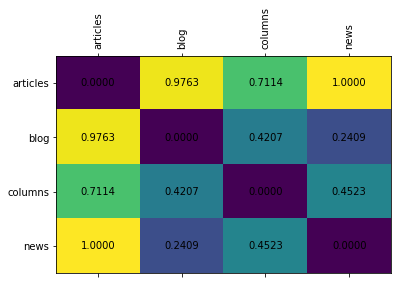

In [17]:
clf.fit(vtrain_perc, y_train)
y_predicted = clf.predict(vtest_perc)
print(classification_report(y_test, y_predicted, clf.classes_))
print(adjusted_mutual_info_score(y_test, y_predicted))
plot_clf_classes_distances(clf)

In [22]:
show_all_top_features(tfidf, clf, n=60)

articles:
и : -5.670313143488269
а : -5.821706762648406
о : -5.841225797281529
 п: -5.867909566407633
і : -5.982234938377534
 в: -6.000420003643345
е : -6.024897538275517
у : -6.0894873276931145
 н: -6.103439171068313
на: -6.1234521672335935
ро: -6.151456852278681
я : -6.152809047928542
 з: -6.171448553632931
ти: -6.192373485182606
ст: -6.284558541925246
 с: -6.293621005539062
в : -6.3214607526416575
 д: -6.327274120208953
ов: -6.33425457951955
ва: -6.3589978688009365
ра: -6.362422657113458
ко: -6.3883028163835585
пр: -6.393468080377465
та: -6.415522669489558
но: -6.4163039127759705
ни: -6.418930598548525
 т: -6.419619159382915
ан: -6.424951798841656
по: -6.432336177656165
ен: -6.449442620649148
ер: -6.454544924817348
ат: -6.494948467748712
ал: -6.4972003506425535
ні: -6.5006313964536355
ор: -6.506438226944185
 м: -6.511146404319948
ли: -6.515291255813811
ви: -6.517763763188478
ві: -6.520742728823533
го: -6.522015105637902
не: -6.5266878977784915
ь : -6.545413966813686
ти : -6.55263197

In [19]:
for doc in test:
    doc['category'] = map_category_ukrpravda(doc)
df_test = pd.DataFrame.from_dict(test)
df_test.groupby(['category']).count()

,authors,authors_description,autocategory,body,date,filename,language,tags,text,title,url
category,,,,,,,,,,,
articles,37,0,88,88,34,88,88,24,88,33,88
blog,150,150,150,150,150,150,150,150,150,150,150
columns,36,0,112,112,76,112,112,42,112,51,112
news,0,0,400,400,384,400,400,365,400,384,400


In [20]:
X_test = df_test['text'].values
y_test = df_test['category']
vtest = tfidf.transform(X_test)
vtest_perc = sel_perc.transform(vtest)
y_predicted = clf.predict(vtest_perc)
print(classification_report(y_test, y_predicted, clf.classes_))
print(adjusted_mutual_info_score(y_test, y_predicted))

             precision    recall  f1-score   support

   articles       0.31      0.78      0.45        88
       blog       0.82      0.33      0.47       150
    columns       0.52      0.61      0.56       112
       news       0.97      0.81      0.88       400

avg / total       0.79      0.68      0.70       750

0.36906947545918434


In [21]:
from sklearn.externals import joblib
joblib.dump(clf, 'clf_news_MNB_chars.pkl') 
joblib.dump(tfidf, 'tfidf_news_MNB_chars.pkl')
joblib.dump(sel_perc, 'featsel_news_MNB_chars.pkl')

['featsel_news_MNB_chars.pkl']

## experimenting